In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
from collections import Counter

# Basic Data Analysis

In [2]:
df = pd.read_csv("BigML_Dataset_6100f0a85e269e0556001fe9.csv")

In [3]:
len(df)

516174

In [4]:
df.describe()

,Band,Lyrics,Song
count,516174,516165,516170
unique,42625,400743,285216
top,Frank Sinatra,"Somewhere over the rainbow, way up high\r\nThe...",Over the Rainbow
freq,1403,624,550


In [5]:
len(df.drop_duplicates(subset=['Lyrics']))

400744

In [6]:
len(df)

516174

In [7]:
null_rows = pd.DataFrame({"null_count": df.isnull().sum()})
null_rows

,null_count
Band,0
Lyrics,9
Song,4


## Title

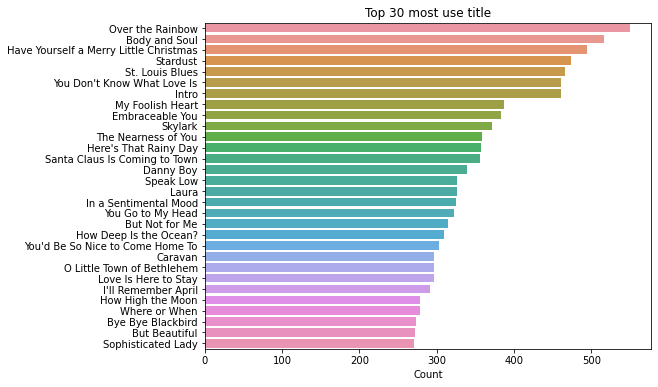

In [28]:
title_vc = pd.DataFrame({"Count": df["Song"].value_counts()})
plt.figure(figsize=(8,6))
sns.barplot(y=title_vc[0:30].index, x=title_vc[0:30]["Count"], orient='h')
plt.title("Top 30 most use title")
plt.show()

## Band

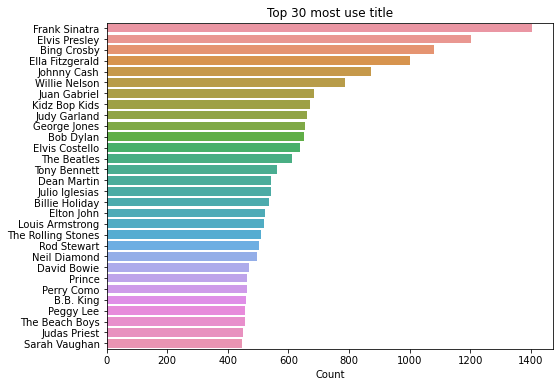

In [32]:
band_vc = pd.DataFrame({"Count": df["Band"].value_counts()})
plt.figure(figsize=(8,6))
sns.barplot(y=band_vc[0:30].index, x=band_vc[0:30]["Count"], orient='h')
plt.title("Top 30 most use title")
plt.show()

## Lyrics

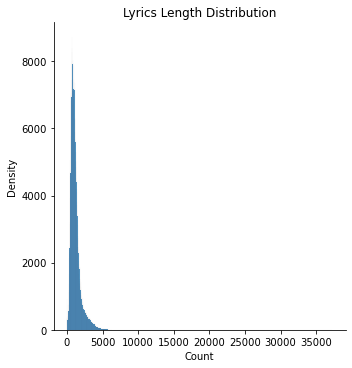

In [54]:
lyrics_length = df['Lyrics'].fillna("").apply(len)
sns.displot(lyrics_length)
plt.title("Lyrics Length Distribution")
plt.xlabel("Count")
plt.ylabel("Density")
plt.show()

In [51]:
min(lyrics_length), max(lyrics_length)

(1.0, 37260.0)

## words count in lyrics

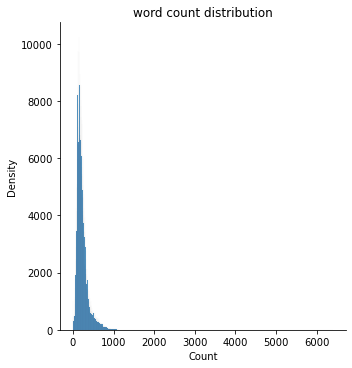

In [56]:
def count_word(x):
    return len(x.split())

word_count = df['Lyrics'].fillna("").apply(count_word)
sns.displot(word_count)
plt.title("word count distribution")
plt.xlabel("Count")
plt.ylabel("Density")
plt.show()

In [57]:
min(word_count),max(word_count)

(0, 6392)

In [67]:

["{}:{}".format(id,len(x)) for id,x in enumerate(df['Lyrics'].fillna("")) if len(x)==37260]

['248208:37260']

In [68]:
df["Lyrics"].iloc[248208]

"„Hello, children\r\nHello\r\nAre you ready?\r\nThen we'll begin“\r\n\r\nEy\r\nHier sind die Beginner, woo\r\nYeah\r\nDas is' für die alten Zeiten\r\nFür den alten Vibe, den alten Flash\r\nEin Mixtape wie früher\r\nGemixt, gecutted, gestyled\r\nFür all die sie sagen: „Ey\r\nWieso klingt der neue Scheiß nicht wie Bambule?\r\nUnd was macht dieser Gzuz Typ da im Video?“\r\nAber alles cool\r\nWir haben das ja selber mal gehört\r\nSelber mal gemacht\r\nUnd es bringt riesen Spaß\r\nMit alten Strophen und alten Beats\r\nEimsbush Stylee\r\nAh, check das ab\r\nYo\r\n\r\nWas los? Wir sind im Haus heut' Nacht\r\nHaben euch alte Styles mitgebracht\r\nFür alle, die noch mit uns down sind\r\nUnd immer wiederkommen, wenn wir unseren Sound bringen\r\n\r\nWir sind im Haus heut' Nacht\r\nHaben euch alte Styles mitgebracht\r\nFür alle, die noch mit uns down sind\r\nUnd immer wiederkommen, wenn wir unseren Sound bringen\r\n\r\nEizi Eiz - „Das E“\r\nDenyo - „Das D“\r\nDj Mad am Mix - „Das M“\r\nUnd Mister 

## StopWord

In [2]:
import nltk
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [9]:
def count_stopword(x):
    res = []
    for i in x.split():
        if i in sw : 
            res.append(i)
    return res
def sum_stopword(c_sw,dsc):
    
    res = {}
    for i in c_sw:
        for j in i : 
            if j in res:
                res[j] += 1
            else:
                res[j] = 1
    return sorted(res.items(), key=lambda x:x[1], reverse=dsc)

In [78]:
c_sw = df['Lyrics'].fillna("").apply(count_stopword)

In [111]:
sum_sw_asc = sum_stopword(c_sw,False)
sum_sw_dsc = sum_stopword(c_sw,True)

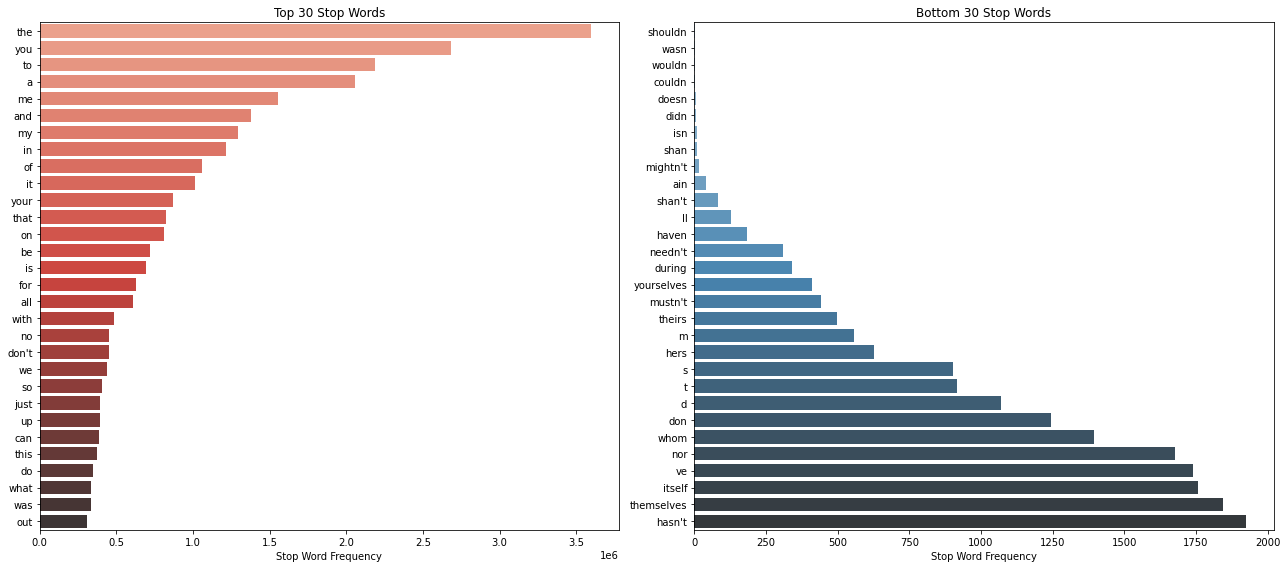

In [132]:
asc_x,asc_y = zip(*sum_sw_asc)
dsc_x,dsc_y = zip(*sum_sw_dsc)

fig, ax = plt.subplots(1,2, figsize=(18,8))
sns.barplot(y=list(dsc_x)[:30], x=list(dsc_y)[:30], orient='h', palette="Reds_d", ax=ax[0])
sns.barplot(y=list(asc_x)[:30], x=list(asc_y)[:30], orient='h', palette="Blues_d", ax=ax[1]) 
ax[0].set_title("Top 30 Stop Words")
ax[0].set_xlabel("Stop Word Frequency")
ax[1].set_title("Bottom 30 Stop Words")
ax[1].set_xlabel("Stop Word Frequency")
plt.tight_layout()
plt.show()

## Punctuation

In [16]:
punc_list = string.punctuation
def count_punc():
    res = {}
    for i in df['Lyrics'].fillna(""):
        for j in list(i):
            if j in list(punc_list):
                if j in res:
                    res[j] += 1
                else :
                    res[j] = 1
    return res

In [17]:
punct_sum = count_punc()

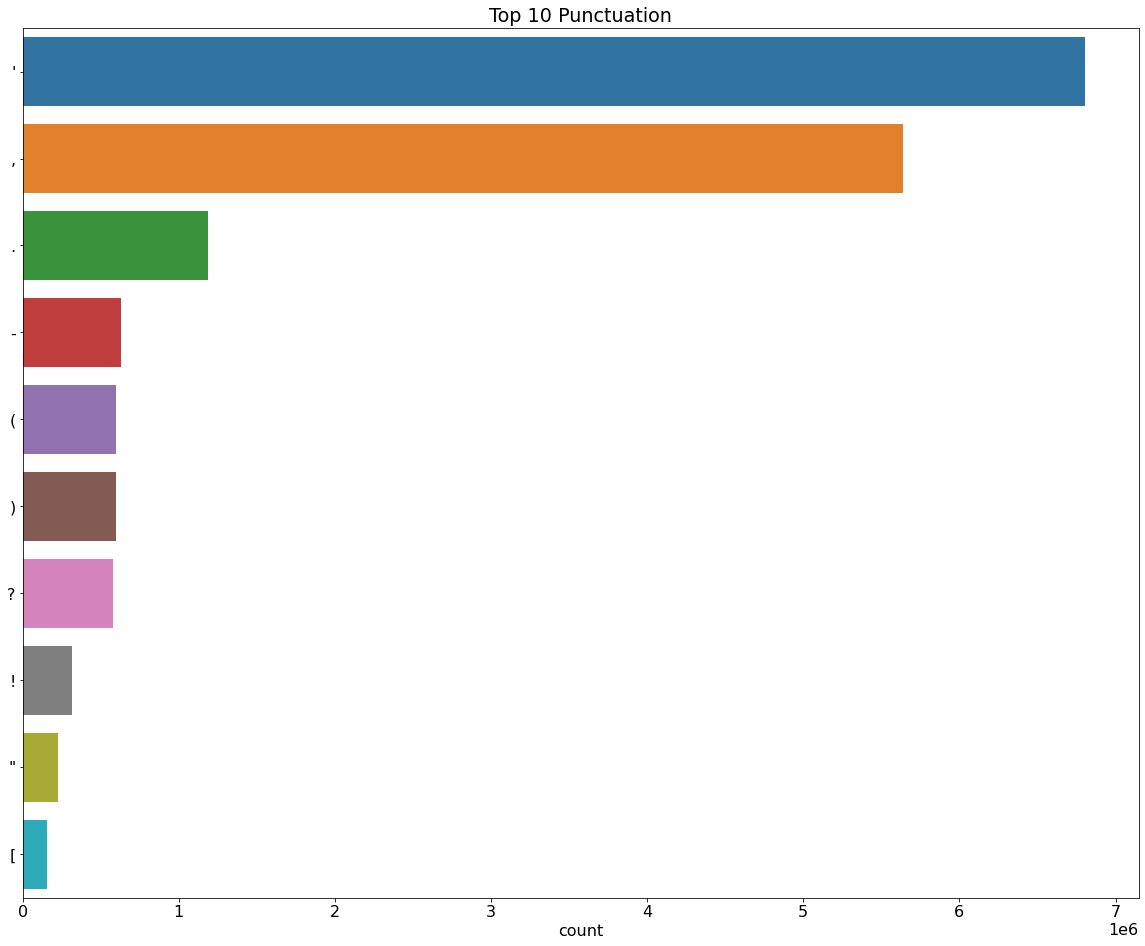

In [75]:
sort_punc = sorted(punct_sum.items(), key=lambda x:x[1], reverse=True)
punc_x,punc_y = zip(*sort_punc)
plt.figure(figsize=(20,16))
sns.barplot(x=list(punc_y)[:10],y=list(punc_x)[:10])
plt.title("Top 10 Punctuation")
plt.xlabel("count")
plt.show()

In [55]:
pd.DataFrame(sort_punc)[:10]

,0,1
0,',6806988
1,",",5638354
2,.,1187127
3,-,632170
4,(,599583
5,),599572
6,?,579348
7,!,318706
8,"""",229077
9,[,154292


## Grams

In [12]:
def count_non_stopword(x):
    res = []
    for i in x.split():
        if i not in sw : 
            res.append(i)
    return res

def sum_non_stopword(gram):
    res= {}
    for i in gram:
        for j in i:
            if j in res:
                res[j] +=1
            else :
                res[j] = 1
    return res


In [60]:
unigram = df['Lyrics'].fillna("").apply(count_non_stopword)

In [70]:
sum_unigram = sum_non_stopword(unigram)
sorted_sum_unigram = sorted(sum_unigram.items(), key=lambda x:x[1] , reverse=True)

In [72]:
uni_x,uni_y = zip(*sorted_sum_unigram)

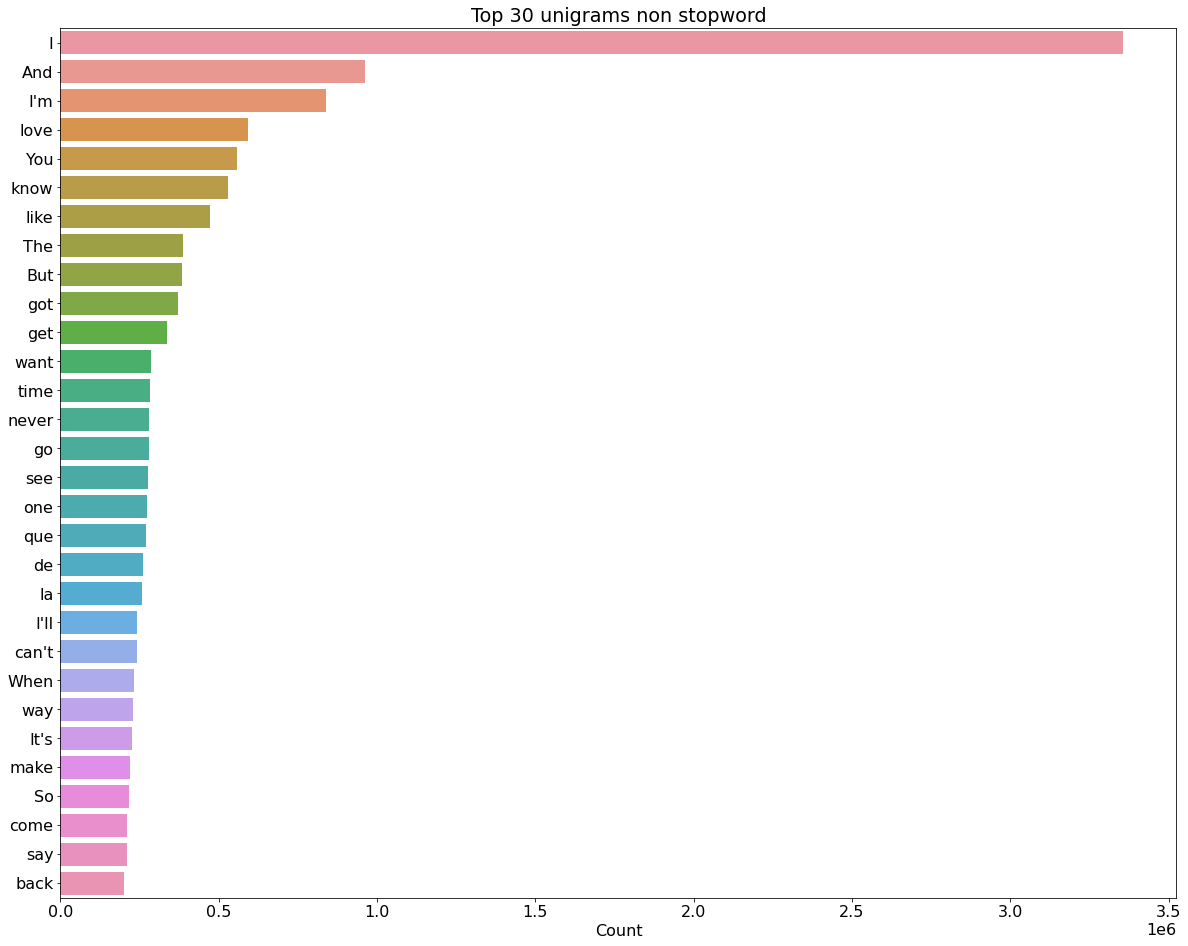

In [78]:
plt.figure(figsize=(20,16))
sns.barplot(x=list(uni_y)[:30],y=list(uni_x)[:30])
plt.title("Top 30 unigrams non stopword")
plt.xlabel("Count")
plt.show()

In [10]:
def count_bigrams(x):
    return ngrams(x.split(),2)

    
bigrams = df["Lyrics"].fillna("").apply(count_bigrams)

In [13]:
sum_bigrams = sum_non_stopword(bigrams)
sorted_sum_bigrams = sorted(sum_bigrams.items(), key=lambda x:x[1] , reverse=True)

In [17]:
big_x,big_y = zip(*sorted_sum_bigrams[:30])

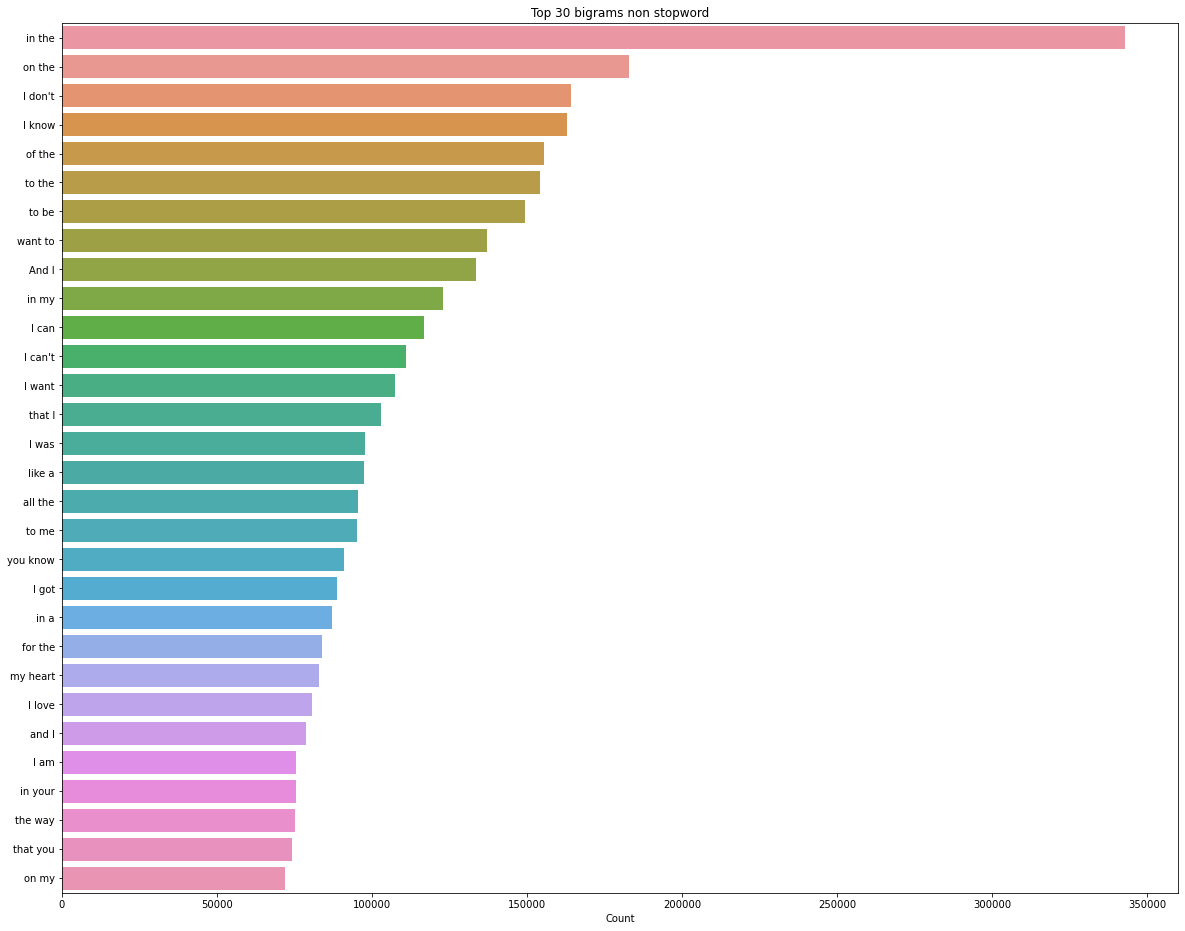

In [29]:
def join_bigrams(sort_gram):
    res = []
    for i in sort_gram:
        res.append(" ".join(i))
    return res

plt.figure(figsize=(20,16))
sns.barplot(x=list(big_y),y=join_bigrams(big_x))
plt.title("Top 30 bigrams non stopword")
plt.xlabel("Count")
plt.show()

# Training Model

## Data Selection

In [167]:
print("Total Data : {}".format(len(df)))
df_selected = df.sample(n = 10000)

Total Data : 516174


In [168]:
print("Total Selected Data : {}".format(len(df_selected)))
df_selected.to_csv("selected_data.csv",index=False)

Total Selected Data : 10000


In [3]:
df_selected = pd.read_csv("selected_data.csv")
df_selected

,Band,Lyrics,Song
0,Aya,looking for the sun\r\nlooking for the sunshin...,Looking for the Sun
1,Luis Miguel,no sé qué está pasando\r\nque todo está al rev...,Sera Que No Me Amas (Blame It on the Boogie)
2,Wayne Kerr,"if ever you got rain in your heart, \r\nsomeon...",Run to You
3,Rush,and the men who hold high places\r\nmust be th...,Closer to the Heart [Rush in Rio]
4,Blur,i see her face\r\neveryday\r\ni see her face\r...,She's So High [Seymour Rehersal]
...,...,...,...
9995,Cinerama,you got a thing about you\ni just can't live w...,Elenore
9996,Ednita Nazario,"es vanidad, quizás pensar que abra más y quere...",Voy
9997,Litfiba,"tic toc, tic toc, maria si sveglia\r\nla notte...",Maria Coraggio
9998,The Lemonheads,"she's coming over,\r\nwe'll go out walking,\r\...",My Drug Buddy


## Pre-Processing

In [4]:
from nltk.tokenize import word_tokenize

def lowering_case(dataframe):
    dataframe = dataframe.fillna("").applymap(lambda x:x.lower())
    return dataframe

def delete_escape_character(dataframe):
    return dataframe.replace(to_replace="\r|\n",value=" ",regex=True) 

def remove_punctuation(dataframe):
    dataframe[['Lyrics','Song']] = dataframe[['Lyrics','Song']].replace(to_replace="[^\w\s]",value="",regex=True)
    return dataframe

def remove_stopword(dataframe):
    dataframe['Lyrics'] = dataframe['Lyrics'].apply(lambda x: " ".join([i for i in x.split() if i not in sw]))
    return dataframe

In [5]:
clean_df = lowering_case(df_selected)
clean_df = delete_escape_character(clean_df)
clean_df = remove_stopword(clean_df)
clean_df = remove_punctuation(clean_df)

In [6]:
clean_df

,Band,Lyrics,Song
0,aya,looking sun looking sunshine looking sun looki...,looking for the sun
1,luis miguel,sé qué está pasando que todo está al revés que...,sera que no me amas blame it on the boogie
2,wayne kerr,ever got rain heart someone hurt you torn apar...,run to you
3,rush,men hold high places must ones start mold new ...,closer to the heart rush in rio
4,blur,see face everyday see face help see face every...,shes so high seymour rehersal
...,...,...,...
9995,cinerama,got thing cant live without really want elenor...,elenore
9996,ednita nazario,es vanidad quizás pensar que abra más querer a...,voy
9997,litfiba,tic toc tic toc maria si sveglia la notte è lu...,maria coraggio
9998,the lemonheads,coming over well go walking make call way phon...,my drug buddy


In [7]:
import random
random_index = random.randint(0,len(df_selected)-1)
print("sample length before cleaning : {}".format(len(list(df_selected["Lyrics"].iloc[random_index]))))
print("sample length after cleaning : {}".format(len(list(clean_df["Lyrics"].iloc[random_index]))))


sample length before cleaning : 616
sample length after cleaning : 330


In [8]:
print("sample cleaned lyrics : ")
clean_df["Lyrics"].iloc[random_index]

sample cleaned lyrics : 


'every time rains rains pennies heaven know cloud contains pennies heaven find fortune fallin town sure umbrella upside trade package sunshine flowers want things love must showers hear thunder run tree therell pennies heaven trade package sunshine flowers want things love must showers hear thunder run tree therell pennies heaven'

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
def stem_words(words_list, stemmer):
    return [stemmer.stem(word) for word in words_list]

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_words(tokens, stemmer)
    return stems

tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenize)
tfs = tfidf_vectorizer.fit_transform(clean_df["Lyrics"])

## Save Vectorization Result

In [11]:
from scipy.sparse import csr_matrix
import numpy as np
def save_sparse_csr(filename,array):
    np.savez(filename,data = array.data ,indices=array.indices,
             indptr =array.indptr, shape=array.shape )

def load_sparse_csr(filename):
    loader = np.load(filename)
    return csr_matrix((loader['data'], loader['indices'], loader['indptr']),
                         shape = loader['shape'])

save_sparse_csr('res_tf_idf.npz', tfs)

In [12]:
tfs = load_sparse_csr("res_tf_idf.npz")

## Nearest neighbour

In [19]:
from sklearn.neighbors import NearestNeighbors

model_nn = NearestNeighbors(metric='cosine', algorithm='brute')
model_nn.fit(tfs)

NearestNeighbors(algorithm='brute', metric='cosine')

## KMeans

In [25]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

def calculate_distortions():
    dist = []
    data_train = tfs.todense()
    for i in range(20):
        model = KMeans(n_clusters=i)
        model.fit(data_train)
        dist.append(model._inertia)
    return dist

In [26]:
dist_list = calculate_distortions()

C:\Users\ZEN\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:94: RuntimeWarning: divide by zero encountered in log
  n_local_trials = 2 + int(np.log(n_clusters))


OverflowError: cannot convert float infinity to integer

## KMeans Clustering